In [1]:
!pip install tensorflow opencv-python numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
train_dir = "/content/drive/MyDrive/train/"


In [6]:
!pip install tensorflow opencv-python numpy matplotlib


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [8]:
img_size = 64  # Resize images to 64x64 pixels
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% validation

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset="training")

val_data = train_datagen.flow_from_directory(
    train_dir, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset="validation")


Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [11]:
from tensorflow.keras.layers import Input

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 523s 10s/step - accuracy: 0.6499 - loss: 1.1248 - val_accuracy: 0.7875 - val_loss: 1.0103
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 461ms/step - accuracy: 1.0000 - loss: 2.1106e-04 - val_accuracy: 0.8450 - val_loss: 0.8397
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 412ms/step - accuracy: 1.0000 - loss: 3.3123e-05 - val_accuracy: 0.8450 - val_loss: 0.8174
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - accuracy: 1.0000 - loss: 2.8134e-05 - val_accuracy: 0.8475 - val_loss: 0.7991
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 1.0000 - loss: 2.4828e-05 - val_accuracy: 0.8500 - val_loss: 0.7975
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 468ms/step - accuracy: 1.0000 - loss: 1.5318e-05 - val_accuracy: 0.8500 - val_loss: 0.7869
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 1.0000 - loss: 1.4608e-05 - val_accuracy: 0.8475 - val_loss: 0.7817
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 1.0000 - 

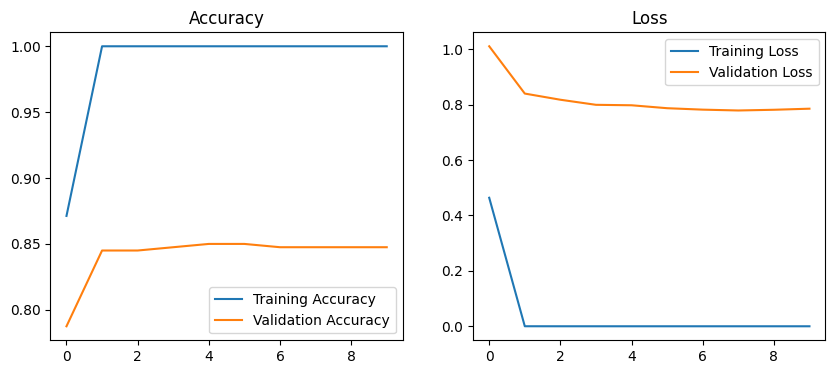

In [14]:
import matplotlib.pyplot as plt

# Get accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [21]:
import os

image_path = "/content/drive/MyDrive/train/01_palm/frame_00_01_0001.png"
print("File exists:", os.path.exists(image_path))

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model

    prediction = model.predict(img)
    class_index = np.argmax(prediction)  # Get class index

    class_labels = list(train_data.class_indices.keys())  # Class names
    print(f"Predicted Gesture: {class_labels[class_index]}")

# Example usage:
predict_image("/content/drive/MyDrive/train/01_palm/frame_00_01_0001.png")


File exists: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Gesture: 02_l


In [16]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image. Check file path!")
        return

    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model

    prediction = model.predict(img)
    class_index = np.argmax(prediction)  # Get class index
    class_labels = list(train_data.class_indices.keys())  # Class names

    print(f"Predicted Gesture: {class_labels[class_index]}")


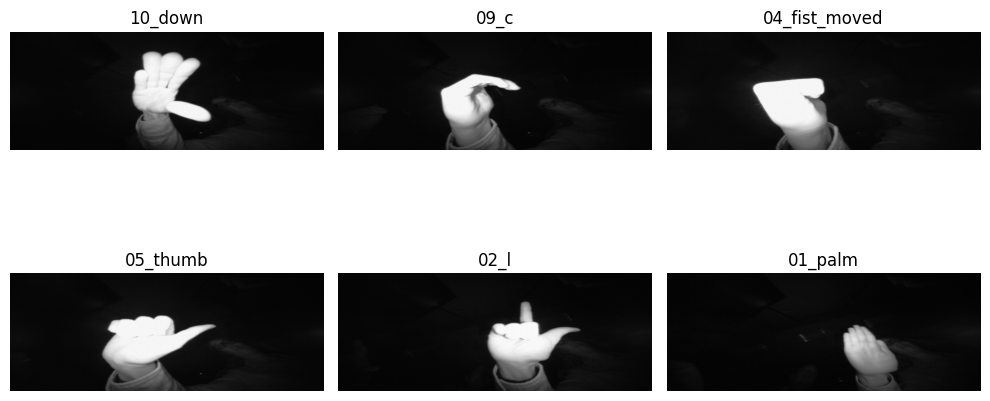

In [27]:
import os
import numpy as np

# Select folder path (Modify as per your dataset structure)
folder_path = "/content/drive/MyDrive/train/"

# Get first 6 image paths from the dataset
image_files = []
for gesture_folder in os.listdir(folder_path):
    gesture_path = os.path.join(folder_path, gesture_folder)
    if os.path.isdir(gesture_path):  # Only directories (gesture categories)
        first_image = os.listdir(gesture_path)[0]  # Pick first image
        image_files.append(os.path.join(gesture_path, first_image))
    if len(image_files) == 6:  # Stop after 6 images
        break

# Plot images in a grid
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, img_path in zip(axes.flatten(), image_files):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(os.path.basename(os.path.dirname(img_path)))  # Show class label

plt.tight_layout()
plt.show()


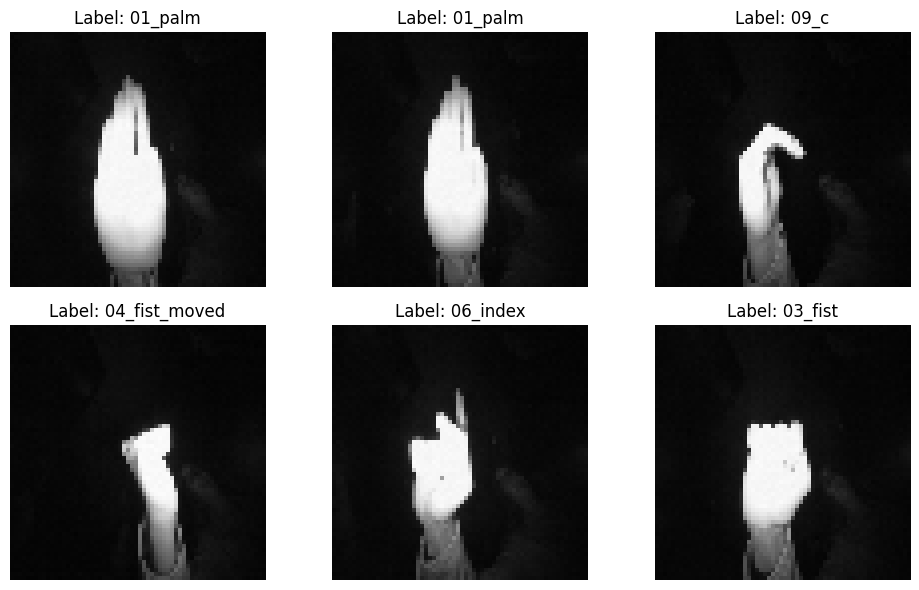

In [29]:
batch = next(iter(train_data))  # Get one batch of images
images, labels = batch

# Plot images with labels
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
class_labels = list(train_data.class_indices.keys())  # Get class names

for i, ax in enumerate(axes.flatten()):
    img = images[i]
    label = class_labels[np.argmax(labels[i])]  # Convert one-hot to label
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [34]:
model.save('/content/drive/MyDrive/hand_gesture_model.keras')
print("File Stored to Drive")

File Stored to Drive


In [32]:
import os
print("File exists:", os.path.exists("/content/drive/MyDrive/hand_gesture_model.keras"))


File exists: True


In [35]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/hand_gesture_model.h5')

# Check model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,444 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)